In [2]:
%matplotlib inline
import numpy as np
from scipy.special import gammaln
import matplotlib.pyplot as plt

# Approximating a single sum-to-one constraint

Given some potential $\mu$, compute

$$
\begin{align}
Z &= \sum_z \left[\sum_i z_i = 1\right] \, e^{\sum_i \mu_i z_i} \\
&= \sum_i e^{\mu_i z_i}
\end{align}
$$

and the marginals

$$
\pi_i = \frac{e^{\mu_i}}{Z}
$$

We can approximate the constraint with a potential $\nu$ and a constant $C$, such that

$$
\begin{align}
Z &= C \sum_z e^{\sum_i \mu_i + \nu_i} \\
&= C \prod_i \left(1 + e^{\mu_i + \nu_i}\right)
\end{align}
$$

Solving for $C$ gives

$$
C = \frac{\sum_i e^{\mu_i}}{\prod_i \left(1 + e^{\mu_i + \nu_i}\right)}
$$

Matching the means yields

$$
\pi_i = \frac{1}{1 + e^{-(\mu_i + \nu_i)}}
$$

which is solved for $\nu_i$ by setting

$$
\nu_i = \log\frac{\pi_i}{1 - \pi_i} - \mu_i
$$

In [39]:
def get_nu(n):
    return .5 * np.log(1. / (n - 1.))

def get_C(n):
    return get_nu(n) + np.log(n) - n * get_bernoulli(n)

def get_bernoulli(n):
    return np.log(1. + np.exp(2. * get_nu(n)))
    
def approx(n):
    return 2 * n * get_C(n) + n ** 2 * get_bernoulli(n)

n = 2 + np.arange(9)
correct = gammaln(n + 1)

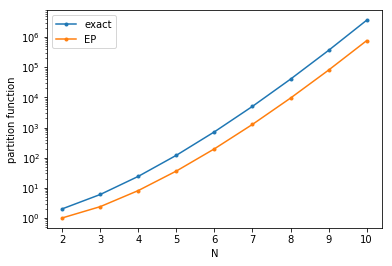

In [51]:
fig, ax = plt.subplots()
ax.plot(n, np.exp(correct), '.-', label='exact')
ax.plot(n, np.exp(approx(n)), '.-', label='EP')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('partition function')
ax.legend()
fig.savefig('../assets/img/2019-10-10-probabilistic-matching/partition-function-degenerate.png', transparent=False)